In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

import yfinance as yf
import indicator_generator

#### Getting the data from Yahoo Finance

In [62]:
#downloading all the companies data from Yahoo Finance

#setting the time frame - 10 years of data
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2022, 12, 31)

#getting Google data
df = yf.download("GOOG", start, end)

#add the other companies Close values to the Googles df
companies = {"Microsoft":"MSFT", "Amazon":"AMZN", "Meta":"META", "Apple":"AAPL"}
for key, value in companies.items():
    df_other = yf.download(value, start, end)
    df[value + " Close"] = df_other["Close"]

df.info()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2518 non-null   float64
 1   High        2518 non-null   float64
 2   Low         2518 non-null   float64
 3   Close       2518 non-null   float64
 4   Adj Close   2518 non-null   float64
 5   Volume      2518 non-null   int64  
 6   MSFT Close  2518 non-null   float64
 7   AMZN Close  2518 non-null   float64
 8   META Close  2518 non-null   float64
 9   AAPL Close  2518 non-null   float64
dtypes: float64(9), int64(1)
memory us

#### Feature Engineering

In [63]:
#getting the Generator class from indicator_generator.py
Generator = indicator_generator.Generator()

#creating % change
df['pct_change'] = (df['Close'] - df['Close'].shift(1))/ df['Close'].shift(1)

#creating log change
df['log_change'] = np.log(df['Close']/ df['Close'].shift(1))

#creating 7, 14 and 21 day MA
df['7ma'] = Generator.EMA(df['Close'], 7)
df['14ma'] = Generator.EMA(df['Close'], 14)
df['21ma'] = Generator.EMA(df['Close'], 21)

#creating 7 and 14 day MACD 
df['7macd'] = Generator.MACD(df['Close'], 3, 11, 7)
df['14macd'] = Generator.MACD(df['Close'], 7, 21, 14)

#creating 7, 14 and 21 day RSI 
df['7rsi'] = Generator.RSI(df['Close'], 7)
df['14rsi'] = Generator.RSI(df['Close'], 14)
df['21rsi'] = Generator.RSI(df['Close'], 21)

#creating 7, 14 and 21 day ATR 
df['7atr'] = Generator.atr(df['High'], df['Low'], 7)
df['14atr'] = Generator.atr(df['High'], df['Low'], 14)
df['21atr'] = Generator.atr(df['High'], df['Low'], 21)

#creating 7, 14 and 21 day Bollinger Bands
df['7upper'], df['7lower'] = Generator.bollinger_band(df['Close'], 7)
df['14upper'], df['14lower'] = Generator.bollinger_band(df['Close'], 14)
df['21upper'], df['21lower'] = Generator.bollinger_band(df['Close'], 21)

#creating 7, 14 and 21 day RSV 
df['7rsv'] = Generator.rsv(df['Close'], 7)
df['14rsv'] = Generator.rsv(df['Close'], 14)
df['21rsv'] = Generator.rsv(df['Close'], 21)


In [64]:
#seeing how it looks after the feature engineering
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2518 non-null   float64
 1   High        2518 non-null   float64
 2   Low         2518 non-null   float64
 3   Close       2518 non-null   float64
 4   Adj Close   2518 non-null   float64
 5   Volume      2518 non-null   int64  
 6   MSFT Close  2518 non-null   float64
 7   AMZN Close  2518 non-null   float64
 8   META Close  2518 non-null   float64
 9   AAPL Close  2518 non-null   float64
 10  pct_change  2517 non-null   float64
 11  log_change  2517 non-null   float64
 12  7ma         2518 non-null   float64
 13  14ma        2518 non-null   float64
 14  21ma        2518 non-null   float64
 15  7macd       2518 non-null   float64
 16  14macd      2518 non-null   float64
 17  7rsi        2511 non-null   float64
 18  14rsi       2504 non-null   float64
 19  21rsi    

In [65]:
#remove Nan values
df.dropna(inplace=True)

#moving Close column to end
df['Close'] = df.pop('Close')

#### Checking the correlation values of the new features

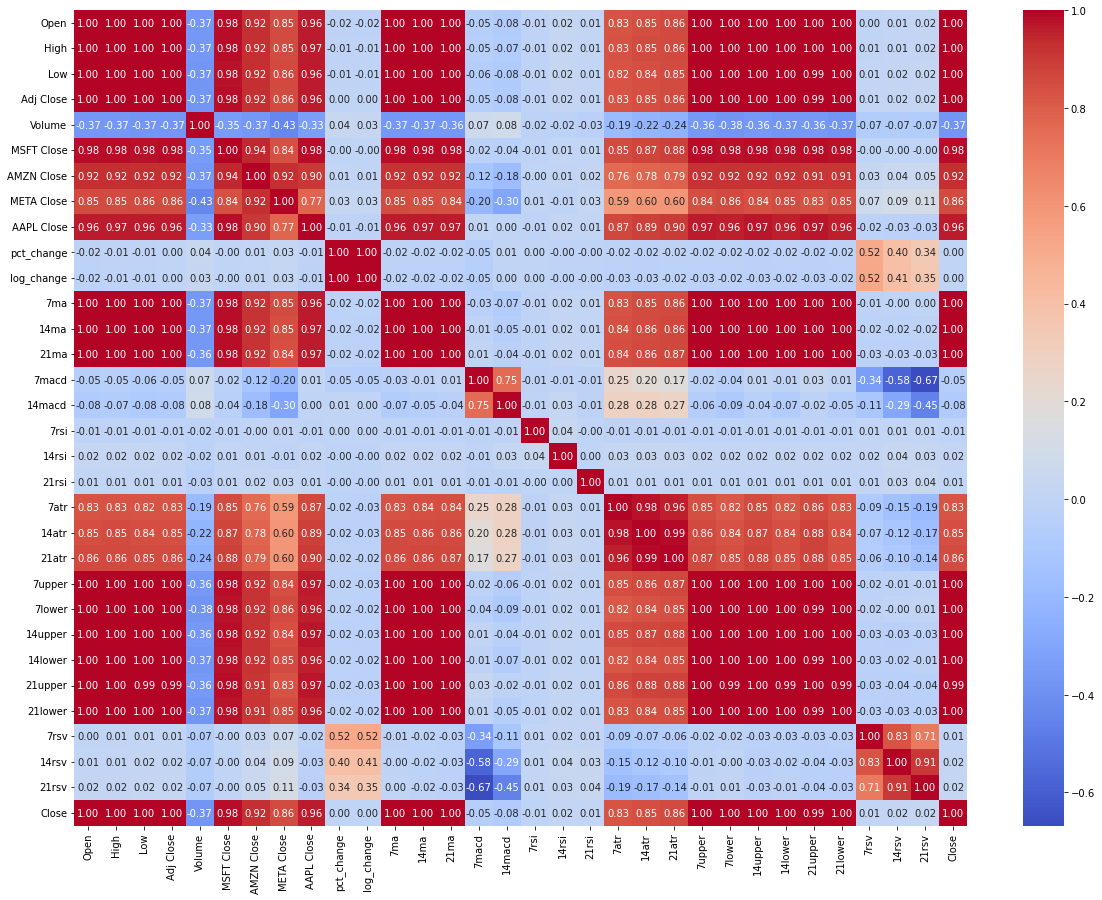

In [66]:
#getting the correlations
corr = df.corr()

#plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

#### Removing poor indicators
Volume, pct_change, log_change, 7macd, 14macd, 7rsi, 14rsi, 21rsi, 7rsv, 14rsv, 21rsv

In [67]:
#dropping poorly correlated featuress
df.drop(["Volume", "pct_change", "log_change", "7macd", "14macd", "7rsi", "14rsi", "21rsi", "7rsv", "14rsv", "21rsv"], axis=1, inplace=True)

In [68]:
#seeing final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2497 entries, 2013-02-01 to 2022-12-30
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2497 non-null   float64
 1   High        2497 non-null   float64
 2   Low         2497 non-null   float64
 3   Adj Close   2497 non-null   float64
 4   MSFT Close  2497 non-null   float64
 5   AMZN Close  2497 non-null   float64
 6   META Close  2497 non-null   float64
 7   AAPL Close  2497 non-null   float64
 8   7ma         2497 non-null   float64
 9   14ma        2497 non-null   float64
 10  21ma        2497 non-null   float64
 11  7atr        2497 non-null   float64
 12  14atr       2497 non-null   float64
 13  21atr       2497 non-null   float64
 14  7upper      2497 non-null   float64
 15  7lower      2497 non-null   float64
 16  14upper     2497 non-null   float64
 17  14lower     2497 non-null   float64
 18  21upper     2497 non-null   float64
 19  21lower  

#### Saving final dataset

In [69]:
#saving final dataframe to csv
df.to_csv("../Data/GOOG.csv")